In [32]:
import pandas as pd
import seaborn as sns
import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

from notears import linear, nonlinear, utils

In [33]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 20, 20, 'ER', 'gauss'



# Let's simulate (and keep) the DAG
B_true = utils.simulate_dag(d, s0, graph_type)

Xs, Ws = np.ndarray((0, n, d)), np.ndarray((0, d, d))

for i in range(100):
    W_true = utils.simulate_parameter(B_true)
    X = utils.simulate_linear_sem(W_true, n, sem_type)
    
    Ws = np.append(Ws, [W_true], axis=0)
    Xs = np.append(Xs, [X], axis=0)


[0, 2, 4, 5, 6, 7, 10, 11, 13, 14, 18, 3, 12, 9, 16, 17, 19, 1, 8, 15]


<BarContainer object of 20 artists>

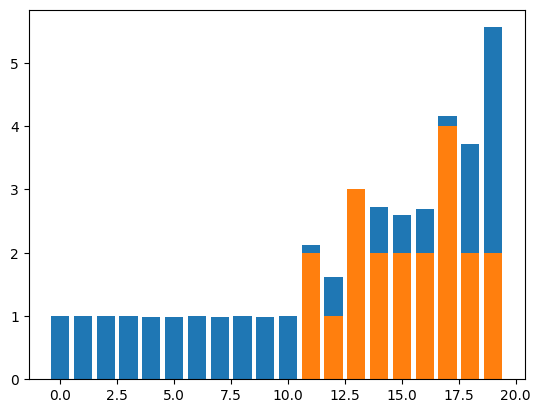

In [34]:
stds = Xs.std(axis=1)

means = stds.mean(axis=0)
stds_ = stds.std(axis=0)

g = ig.Graph.Adjacency(B_true, loops=False)
g.vs["label"] = list(range(d))

sorting = g.topological_sorting()

print(sorting)

means_sorted = []
stds_sorted = []
for s in sorting:
    means_sorted.append(means[s])
    stds_sorted.append(stds[s])

parents = []
for s in sorting:
    parents.append(np.count_nonzero(np.array(g.dfs(s, mode="in")[1]) == s))
    
plt.bar(list(range(d)), means_sorted)
plt.bar(list(range(d)), parents)

In [38]:
for i, m in enumerate(means_sorted):
    print(f"({i}, {m})")

(0, 0.9928423289626646)
(1, 0.997519854842042)
(2, 0.997404173173302)
(3, 1.005087528656859)
(4, 0.9918436885982409)
(5, 0.9903015161825638)
(6, 0.9958546709573786)
(7, 0.9893869508124008)
(8, 0.9972956805731699)
(9, 0.9872548447671917)
(10, 0.9923923575743632)
(11, 2.115234921790405)
(12, 1.6166664332500427)
(13, 2.4604542049818967)
(14, 2.73043526950419)
(15, 2.5902541106591586)
(16, 2.6871780106085112)
(17, 4.162199658326225)
(18, 3.720906623615292)
(19, 5.5634090374091185)


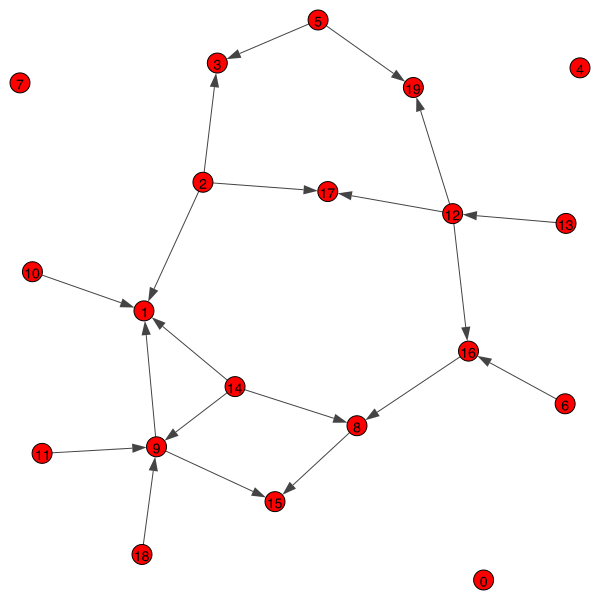

In [35]:
ig.plot(g)

In [42]:
g.ecount()

20

In [5]:
g.ancestors?

Object `g.ancestors` not found.


In [6]:
g.vertex_connectivity?

In [7]:
vertex = 15



In [8]:
g.dfs(16, mode="in")

([16, 12, 13, 6], [-1, 16, 12, 16])

In [15]:
W_est = linear.notears_linear(X, lambda1=0.1, loss_type='l2')

In [16]:
W_est

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.39901798,  0.        ,  0.83597046,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.38228353,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  

In [10]:
W_est[W_est != 0] = 1
g_est = ig.Graph.Adjacency(W_est, loops=False)
g_est.vs["label"] = list(range(d))

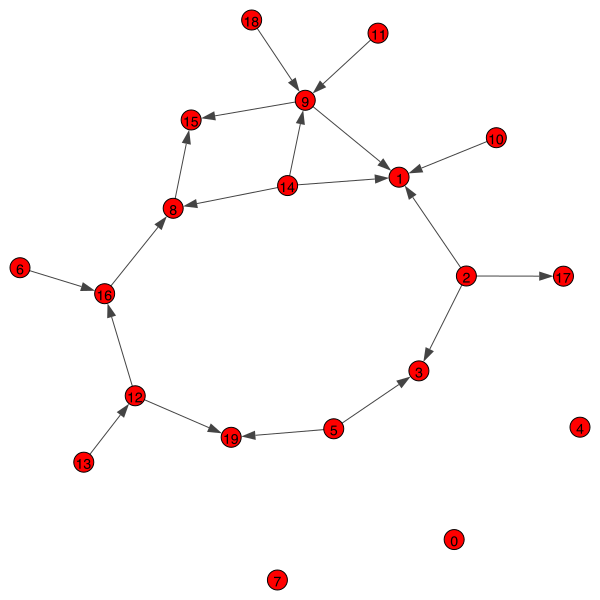

In [11]:
ig.plot(g_est)

In [12]:
utils.count_accuracy(B_true, W_est)

{'fdr': 0.0, 'tpr': 0.95, 'fpr': 0.0, 'shd': 1, 'nnz': 19}

In [13]:
X_norm = X / X.std(axis=0) + X.mean(axis=0)

W_est_norm = linear.notears_linear(X_norm, lambda1=0.1, loss_type='l2')
W_est_norm[W_est_norm != 0] = 1
g_est_norm = ig.Graph.Adjacency(W_est_norm, loops=False)
g_est_norm.vs["label"] = list(range(d))


utils.count_accuracy(B_true, W_est_norm)

{'fdr': 0.7222222222222222,
 'tpr': 0.25,
 'fpr': 0.07647058823529412,
 'shd': 20,
 'nnz': 18}

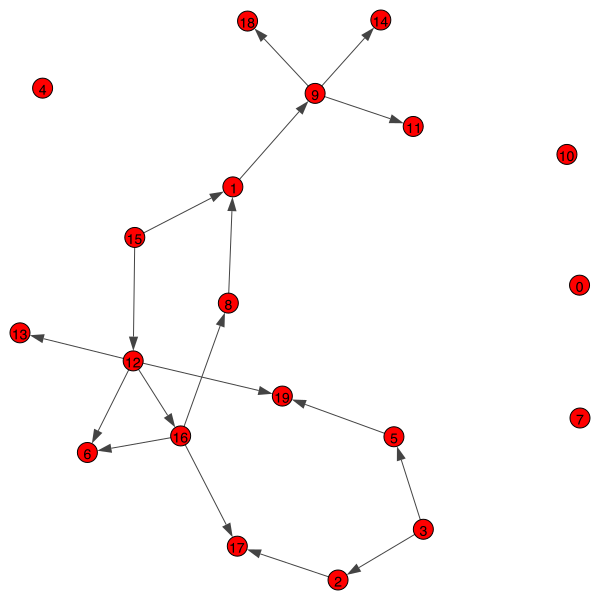

In [14]:
ig.plot(g_est_norm)

In [28]:
sem_type='gauss'

LINEAR_SEMS = [
    "gauss",
    "exp",
    "gumbel",
    "uniform",
    "logistic",
    "poisson",
]
NONLINEAR_SEMS = [
    "mlp",
    "mim",
    "gp",
    "gp-add",
]

run_count=2
n=20
d=10

B_true = utils.simulate_dag(d, s0, graph_type)

Xs, Xs_normalised, Xs_inverted = np.ndarray((0, n, d)), np.ndarray((0, n, d)), np.ndarray((0, n, d))

for _ in range(run_count):
        if sem_type in LINEAR_SEMS:
            W_true = utils.simulate_parameter(B_true)
            X = utils.simulate_linear_sem(W_true, n, sem_type)
        else:
            X = utils.simulate_nonlinear_sem(W_true, n, sem_type)
        
        Xs = np.append(Xs, [X], axis=0)
        Xs_normalised = np.append(Xs_normalised, [X / X.std(axis=0) + X.mean(axis=0)], axis=0)

In [29]:
for i in range(run_count):
    print(Xs[i].shape)
    print(Xs_normalised[i].shape)

(20, 10)
(20, 10)
(20, 10)
(20, 10)


In [30]:
Xs_normalised

array([[[ 2.99431780e+00, -2.76098290e+00,  1.91286637e+00,
         -4.72377882e+00,  1.31440090e+00, -2.33511609e+00,
         -2.86017040e+00,  3.35022380e+00,  1.47253636e+00,
         -2.60595941e+00],
        [ 2.11300670e+00, -2.55501212e+00,  1.46145485e+00,
         -4.73541415e+00,  2.37215068e+00, -2.25099127e+00,
         -3.19645454e+00,  2.83997469e+00,  2.32187863e+00,
         -9.58515924e-01],
        [ 9.85350592e-01, -8.18453466e-01,  1.12461128e+00,
         -2.84781260e+00, -4.60558479e-01, -1.88882804e-01,
         -9.61001263e-01,  8.57326063e-01, -8.81623129e-01,
         -1.39034527e+00],
        [-1.53007623e-02,  2.49550376e-01, -6.63973261e-01,
         -1.61221606e+00, -1.52260020e+00,  6.11236419e-01,
         -1.21592926e-01, -1.88087976e-01, -1.92917342e+00,
         -6.65009089e-01],
        [-9.58186525e-01,  1.16722920e+00, -2.19536325e+00,
         -7.90505371e-01, -6.09555122e-01,  1.58518840e+00,
          8.42446290e-01, -7.66705834e-01, -1.769069